
 *** STG_solver uses 1.18 seconds



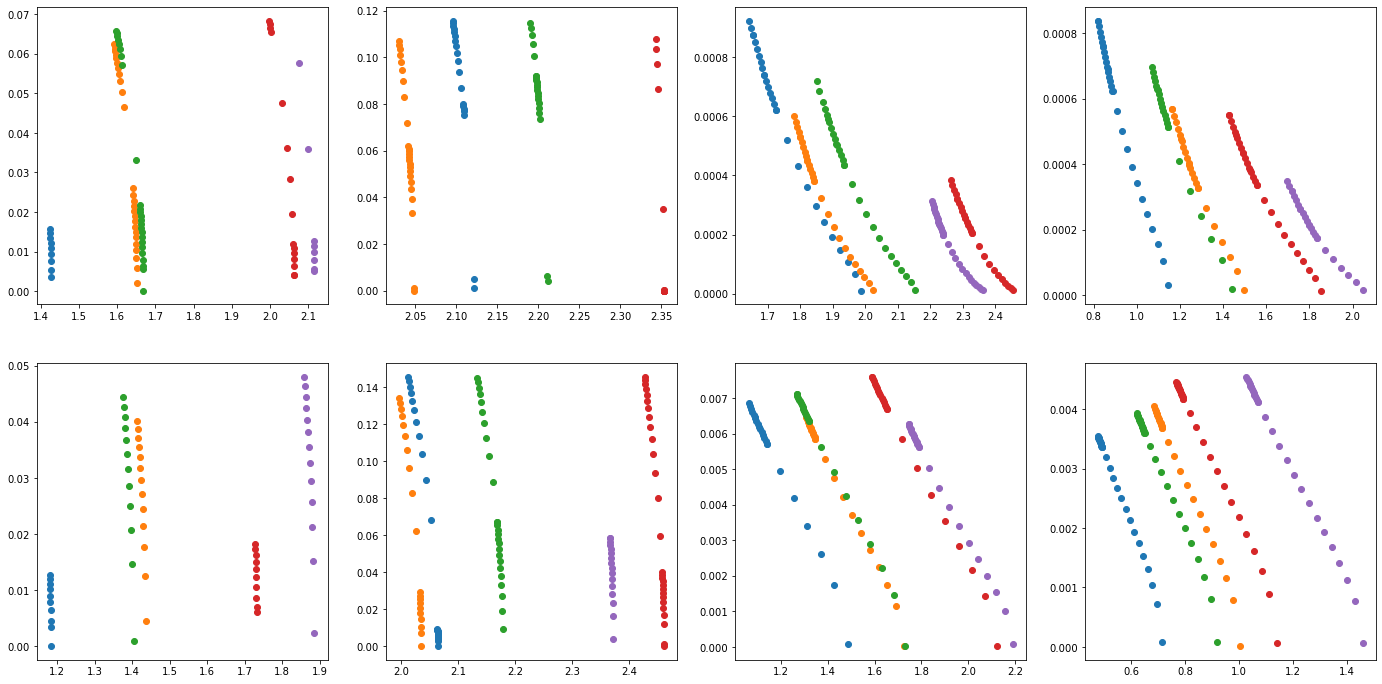

In [1]:
"""
test code: plot M-bphc
"""

import sys
import warnings
import timeit
import numpy as np
import scipy.optimize
from numpy import pi
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.integrate import ode as sp_ode

t0 = timeit.time.time()

PI4 = 4.0 * pi
ka = 8.0 * pi
c = 29979245800.0  # cm/s
G = 6.67408e-8  # cm^3/g/s^2

MSUN = 1.98855e33  # g
KM = 1.0e5  # cm
mB = 1.660538921e-24  # g
E_NUCL = 2.0e14  # minimun energy density for NS core; g/cm^3

runit = 10.*KM # length to parametrize quantities

def rdiml(r):
    """ dimensionless mass """
    return r/runit    
def mdiml(m):
    """ dimensionless mass """
    return G*m/c**2/runit
def pdiml(p):
    """ dimensionless pressure """
    return G*p/c**4 * runit**2

colorset=['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple'] 



fig = plt.figure(figsize=(24,12))
ax1 = fig.add_subplot(241)
ax2 = fig.add_subplot(242)
ax3 = fig.add_subplot(243)
ax4 = fig.add_subplot(244)
ax5 = fig.add_subplot(245)
ax6 = fig.add_subplot(246)
ax7 = fig.add_subplot(247)
ax8 = fig.add_subplot(248)




"""
ax1.set_xlabel(r'$R$', fontsize=20)
ax1.set_ylabel(r'$M$', fontsize=20)
ax2.set_xlabel(r'$x$', fontsize=20)
ax2.set_ylabel(r'$\mu$', fontsize=20)
ax3.set_xlabel(r'$x$', fontsize=20)
ax3.set_ylabel(r'$\Phi$', fontsize=20)
ax4.set_xlabel(r'$x$', fontsize=20)
ax4.set_ylabel(r'$\Phi^{\prime}$', fontsize=20)  

ax5.set_xlabel(r'$R$', fontsize=20)
ax5.set_ylabel(r'$M$', fontsize=20)

ax8.set_xlim([0.5e+15, 1.5e+15])
ax8.set_xlabel(r'$ec$', fontsize=20)
ax8.set_ylabel(r'$\Omega$', fontsize=20)
"""





ntrim1, ntrim2, ntrim3, ntrim4, ntrim5 = 10, 13, 12, 10, 13
ntrim10 = 16

ntrim21, ntrim22, ntrim23, ntrim24, ntrim25 = 9, 27, 26, 15, 8
ntrim30 = 14


# ST M-bphc
stdata1= np.genfromtxt('stgb_tid_v1_comb_data1.txt') 
b01, b11, b21, b31, b41, b51, b61, b71=stdata1[:, 0], stdata1[:, 1], stdata1[:, 2], stdata1[:, 3], stdata1[:, 4], stdata1[:, 5], stdata1[:, 6], stdata1[:, 7] 
ax5.plot(b31[0:ntrim1]/MSUN, b11[0:ntrim1], 'o') 
stdata2= np.genfromtxt('stgb_tid_v1_comb_data2.txt') 
b02, b12, b22, b32, b42, b52, b62, b72=stdata2[:, 0], stdata2[:, 1], stdata2[:, 2], stdata2[:, 3], stdata2[:, 4], stdata2[:, 5], stdata2[:, 6], stdata2[:, 7] 
ax5.plot(b32[0:ntrim2]/MSUN, b12[0:ntrim2], 'o') 
stdata3= np.genfromtxt('stgb_tid_v1_comb_data3.txt') 
b03, b13, b23, b33, b43, b53, b63, b73=stdata3[:, 0], stdata3[:, 1], stdata3[:, 2], stdata3[:, 3], stdata3[:, 4], stdata3[:, 5], stdata3[:, 6], stdata3[:, 7] 
ax5.plot(b33[0:ntrim3]/MSUN, b13[0:ntrim3], 'o') 
stdata4= np.genfromtxt('stgb_tid_v1_comb_data4.txt') 
b04, b14, b24, b34, b44, b54, b64, b74=stdata4[:, 0], stdata4[:, 1], stdata4[:, 2], stdata4[:, 3], stdata4[:, 4], stdata4[:, 5], stdata4[:, 6], stdata4[:, 7] 
ax5.plot(b34[0:ntrim4]/MSUN, b14[0:ntrim4], 'o')
stdata5= np.genfromtxt('stgb_tid_v1_comb_data5.txt') 
b05, b15, b25, b35, b45, b55, b65, b75=stdata5[:, 0], stdata5[:, 1], stdata5[:, 2], stdata5[:, 3], stdata5[:, 4], stdata5[:, 5], stdata5[:, 6], stdata5[:, 7] 
ax5.plot(b35[0:ntrim5]/MSUN, b15[0:ntrim5], 'o') 

stdata6= np.genfromtxt('stgb_tid_v1_comb_data6.txt') 
b06, b16, b26, b36, b46, b56, b66, b76=stdata6[:, 0], stdata6[:, 1], stdata6[:, 2], stdata6[:, 3], stdata6[:, 4], stdata6[:, 5], stdata6[:, 6], stdata6[:, 7] 
ax6.plot(b36/MSUN, b16, 'o') 
stdata7= np.genfromtxt('stgb_tid_v1_comb_data7.txt') 
b07, b17, b27, b37, b47, b57, b67, b77=stdata7[:, 0], stdata7[:, 1], stdata7[:, 2], stdata7[:, 3], stdata7[:, 4], stdata7[:, 5], stdata7[:, 6], stdata7[:, 7] 
ax6.plot(b37/MSUN, b17, 'o') 
stdata8= np.genfromtxt('stgb_tid_v1_comb_data8.txt') 
b08, b18, b28, b38, b48, b58, b68, b78=stdata8[:, 0], stdata8[:, 1], stdata8[:, 2], stdata8[:, 3], stdata8[:, 4], stdata8[:, 5], stdata8[:, 6], stdata8[:, 7] 
ax6.plot(b38/MSUN, b18, 'o') 
stdata9= np.genfromtxt('stgb_tid_v1_comb_data9.txt') 
b09, b19, b29, b39, b49, b59, b69, b79=stdata9[:, 0], stdata9[:, 1], stdata9[:, 2], stdata9[:, 3], stdata9[:, 4], stdata9[:, 5], stdata9[:, 6], stdata9[:, 7] 
ax6.plot(b39/MSUN, b19, 'o') 
stdata10= np.genfromtxt('stgb_tid_v1_comb_data10.txt') 
b010, b110, b210, b310, b410, b510, b610, b710=stdata10[:, 0], stdata10[:, 1], stdata10[:, 2], stdata10[:, 3], stdata10[:, 4], stdata10[:, 5], stdata10[:, 6], stdata10[:, 7] 
ax6.plot(b310[0:ntrim10]/MSUN, b110[0:ntrim10], 'o') 

stdata11= np.genfromtxt('stgb_tid_v1_comb_data11.txt') 
b011, b111, b211, b311, b411, b511, b611, b711=stdata11[:, 0], stdata11[:, 1], stdata11[:, 2], stdata11[:, 3], stdata11[:, 4], stdata11[:, 5], stdata11[:, 6], stdata11[:, 7] 
ax7.plot(b311/MSUN, b111, 'o') 
stdata12= np.genfromtxt('stgb_tid_v1_comb_data12.txt') 
b012, b112, b212, b312, b412, b512, b612, b712=stdata12[:, 0], stdata12[:, 1], stdata12[:, 2], stdata12[:, 3], stdata12[:, 4], stdata12[:, 5], stdata12[:, 6], stdata12[:, 7] 
ax7.plot(b312/MSUN, b112, 'o') 
stdata13= np.genfromtxt('stgb_tid_v1_comb_data13.txt') 
b013, b113, b213, b313, b413, b513, b613, b713=stdata13[:, 0], stdata13[:, 1], stdata13[:, 2], stdata13[:, 3], stdata13[:, 4], stdata13[:, 5], stdata13[:, 6], stdata13[:, 7] 
ax7.plot(b313/MSUN, b113, 'o') 
stdata14= np.genfromtxt('stgb_tid_v1_comb_data14.txt') 
b014, b114, b214, b314, b414, b514, b614, b714=stdata14[:, 0], stdata14[:, 1], stdata14[:, 2], stdata14[:, 3], stdata14[:, 4], stdata14[:, 5], stdata14[:, 6], stdata14[:, 7] 
ax7.plot(b314/MSUN, b114, 'o') 
stdata15= np.genfromtxt('stgb_tid_v1_comb_data15.txt') 
b015, b115, b215, b315, b415, b515, b615, b715=stdata15[:, 0], stdata15[:, 1], stdata15[:, 2], stdata15[:, 3], stdata15[:, 4], stdata15[:, 5], stdata15[:, 6], stdata15[:, 7] 
ax7.plot(b315/MSUN, b115, 'o') 

stdata16= np.genfromtxt('stgb_tid_v1_comb_data16.txt') 
b016, b116, b216, b316, b416, b516, b616, b716=stdata16[:, 0], stdata16[:, 1], stdata16[:, 2], stdata16[:, 3], stdata16[:, 4], stdata16[:, 5], stdata16[:, 6], stdata16[:, 7] 
ax8.plot(b316/MSUN, b116, 'o') 
stdata17= np.genfromtxt('stgb_tid_v1_comb_data17.txt') 
b017, b117, b217, b317, b417, b517, b617, b717=stdata17[:, 0], stdata17[:, 1], stdata17[:, 2], stdata17[:, 3], stdata17[:, 4], stdata17[:, 5], stdata17[:, 6], stdata17[:, 7] 
ax8.plot(b317/MSUN, b117, 'o') 
stdata18= np.genfromtxt('stgb_tid_v1_comb_data18.txt') 
b018, b118, b218, b318, b418, b518, b618, b718=stdata18[:, 0], stdata18[:, 1], stdata18[:, 2], stdata18[:, 3], stdata18[:, 4], stdata18[:, 5], stdata18[:, 6], stdata18[:, 7] 
ax8.plot(b318/MSUN, b118, 'o') 
stdata19= np.genfromtxt('stgb_tid_v1_comb_data19.txt') 
b019, b119, b219, b319, b419, b519, b619, b719=stdata19[:, 0], stdata19[:, 1], stdata19[:, 2], stdata19[:, 3], stdata19[:, 4], stdata19[:, 5], stdata19[:, 6], stdata19[:, 7] 
ax8.plot(b319/MSUN, b119, 'o') 
stdata20= np.genfromtxt('stgb_tid_v1_comb_data20.txt') 
b020, b120, b220, b320, b420, b520, b620, b720=stdata20[:, 0], stdata20[:, 1], stdata20[:, 2], stdata20[:, 3], stdata20[:, 4], stdata20[:, 5], stdata20[:, 6], stdata20[:, 7] 
ax8.plot(b320/MSUN, b120, 'o') 

stdata21= np.genfromtxt('stgb_tid_v1_comb_data21.txt') 
b021, b121, b221, b321, b421, b521, b621, b721=stdata21[:, 0], stdata21[:, 1], stdata21[:, 2], stdata21[:, 3], stdata21[:, 4], stdata21[:, 5], stdata21[:, 6], stdata21[:, 7] 
ax1.plot(b321[0:ntrim21]/MSUN, b121[0:ntrim21], 'o') 
#print(b021[0:ntrim21])
stdata22= np.genfromtxt('stgb_tid_v1_comb_data22.txt') 
b022, b122, b222, b322, b422, b522, b622, b722=stdata22[:, 0], stdata22[:, 1], stdata22[:, 2], stdata22[:, 3], stdata22[:, 4], stdata22[:, 5], stdata22[:, 6], stdata22[:, 7] 
ax1.plot(b322[0:ntrim22]/MSUN, b122[0:ntrim22], 'o') 
stdata23= np.genfromtxt('stgb_tid_v1_comb_data23.txt') 
b023, b123, b223, b323, b423, b523, b623, b723=stdata23[:, 0], stdata23[:, 1], stdata23[:, 2], stdata23[:, 3], stdata23[:, 4], stdata23[:, 5], stdata23[:, 6], stdata23[:, 7] 
ax1.plot(b323[0:ntrim23]/MSUN, b123[0:ntrim23], 'o') 
stdata24= np.genfromtxt('stgb_tid_v1_comb_data24.txt') 
b024, b124, b224, b324, b424, b524, b624, b724=stdata24[:, 0], stdata24[:, 1], stdata24[:, 2], stdata24[:, 3], stdata24[:, 4], stdata24[:, 5], stdata24[:, 6], stdata24[:, 7] 
ax1.plot(b324[0:ntrim24]/MSUN, b124[0:ntrim24], 'o') 
stdata25= np.genfromtxt('stgb_tid_v1_comb_data25.txt') 
b025, b125, b225, b325, b425, b525, b625, b725=stdata25[:, 0], stdata25[:, 1], stdata25[:, 2], stdata25[:, 3], stdata25[:, 4], stdata25[:, 5], stdata25[:, 6], stdata25[:, 7] 
ax1.plot(b325[0:ntrim25]/MSUN, b125[0:ntrim25], 'o') 

stdata26= np.genfromtxt('stgb_tid_v1_comb_data26.txt') 
b026, b126, b226, b326, b426, b526, b626, b726=stdata26[:, 0], stdata26[:, 1], stdata26[:, 2], stdata26[:, 3], stdata26[:, 4], stdata26[:, 5], stdata26[:, 6], stdata26[:, 7] 
ax2.plot(b326/MSUN, b126, 'o') 
stdata27= np.genfromtxt('stgb_tid_v1_comb_data27.txt') 
b027, b127, b227, b327, b427, b527, b627, b727=stdata27[:, 0], stdata27[:, 1], stdata27[:, 2], stdata27[:, 3], stdata27[:, 4], stdata27[:, 5], stdata27[:, 6], stdata27[:, 7] 
ax2.plot(b327/MSUN, b127, 'o') 
stdata28= np.genfromtxt('stgb_tid_v1_comb_data28.txt') 
b028, b128, b228, b328, b428, b528, b628, b728=stdata28[:, 0], stdata28[:, 1], stdata28[:, 2], stdata28[:, 3], stdata28[:, 4], stdata28[:, 5], stdata28[:, 6], stdata28[:, 7] 
ax2.plot(b328/MSUN, b128, 'o') 
#stdata29= np.genfromtxt('stgb_tid_v1_comb_data29.txt') 
#b029, b129, b229, b329, b429, b529, b629, b729=stdata29[:, 0], stdata29[:, 1], stdata29[:, 2], stdata29[:, 3], stdata29[:, 4], stdata29[:, 5], stdata29[:, 6], stdata29[:, 7] 
#ax2.plot(b329/MSUN, b129, 'o') 
stdata30= np.genfromtxt('stgb_tid_v1_comb_data30.txt') 
b030, b130, b230, b330, b430, b530, b630, b730=stdata30[:, 0], stdata30[:, 1], stdata30[:, 2], stdata30[:, 3], stdata30[:, 4], stdata30[:, 5], stdata30[:, 6], stdata30[:, 7] 
ax2.plot(b330[0:ntrim30]/MSUN, b130[0:ntrim30], 'o') 

stdata31= np.genfromtxt('stgb_tid_v1_comb_data31.txt') 
b031, b131, b231, b331, b431, b531, b631, b731=stdata31[:, 0], stdata31[:, 1], stdata31[:, 2], stdata31[:, 3], stdata31[:, 4], stdata31[:, 5], stdata31[:, 6], stdata31[:, 7] 
ax3.plot(b331/MSUN, b131, 'o') 
stdata32= np.genfromtxt('stgb_tid_v1_comb_data32.txt') 
b032, b132, b232, b332, b432, b532, b632, b732=stdata32[:, 0], stdata32[:, 1], stdata32[:, 2], stdata32[:, 3], stdata32[:, 4], stdata32[:, 5], stdata32[:, 6], stdata32[:, 7] 
ax3.plot(b332/MSUN, b132, 'o') 
stdata33= np.genfromtxt('stgb_tid_v1_comb_data33.txt') 
b033, b133, b233, b333, b433, b533, b633, b733=stdata33[:, 0], stdata33[:, 1], stdata33[:, 2], stdata33[:, 3], stdata33[:, 4], stdata33[:, 5], stdata33[:, 6], stdata33[:, 7] 
ax3.plot(b333/MSUN, b133, 'o') 
stdata34= np.genfromtxt('stgb_tid_v1_comb_data34.txt') 
b034, b134, b234, b334, b434, b534, b634, b734=stdata34[:, 0], stdata34[:, 1], stdata34[:, 2], stdata34[:, 3], stdata34[:, 4], stdata34[:, 5], stdata34[:, 6], stdata34[:, 7] 
ax3.plot(b334/MSUN, b134, 'o') 
stdata35= np.genfromtxt('stgb_tid_v1_comb_data35.txt') 
b035, b135, b235, b335, b435, b535, b635, b735=stdata35[:, 0], stdata35[:, 1], stdata35[:, 2], stdata35[:, 3], stdata35[:, 4], stdata35[:, 5], stdata35[:, 6], stdata35[:, 7] 
ax3.plot(b335/MSUN, b135, 'o') 

stdata36= np.genfromtxt('stgb_tid_v1_comb_data36.txt') 
b036, b136, b236, b336, b436, b536, b636, b736=stdata36[:, 0], stdata36[:, 1], stdata36[:, 2], stdata36[:, 3], stdata36[:, 4], stdata36[:, 5], stdata36[:, 6], stdata36[:, 7] 
ax4.plot(b336/MSUN, b136, 'o') 
stdata37= np.genfromtxt('stgb_tid_v1_comb_data37.txt') 
b037, b137, b237, b337, b437, b537, b637, b737=stdata37[:, 0], stdata37[:, 1], stdata37[:, 2], stdata37[:, 3], stdata37[:, 4], stdata37[:, 5], stdata37[:, 6], stdata37[:, 7] 
ax4.plot(b337/MSUN, b137, 'o') 
stdata38= np.genfromtxt('stgb_tid_v1_comb_data38.txt') 
b038, b138, b238, b338, b438, b538, b638, b738=stdata38[:, 0], stdata38[:, 1], stdata38[:, 2], stdata38[:, 3], stdata38[:, 4], stdata38[:, 5], stdata38[:, 6], stdata38[:, 7] 
ax4.plot(b338/MSUN, b138, 'o') 
stdata39= np.genfromtxt('stgb_tid_v1_comb_data39.txt') 
b039, b139, b239, b339, b439, b539, b639, b739=stdata39[:, 0], stdata39[:, 1], stdata39[:, 2], stdata39[:, 3], stdata39[:, 4], stdata39[:, 5], stdata39[:, 6], stdata39[:, 7] 
ax4.plot(b339/MSUN, b139, 'o') 
stdata40= np.genfromtxt('stgb_tid_v1_comb_data40.txt') 
b040, b140, b240, b340, b440, b540, b640, b740=stdata40[:, 0], stdata40[:, 1], stdata40[:, 2], stdata40[:, 3], stdata40[:, 4], stdata40[:, 5], stdata40[:, 6], stdata40[:, 7] 
ax4.plot(b340/MSUN, b140, 'o') 







plt.savefig("fig_nonlin_Mbphc.pdf", format='pdf', bbox_inches="tight")
print( '\n *** STG_solver uses %.2f seconds\n' % (timeit.time.time() - t0))

plt.show()

